In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pytrends.request import TrendReq
import warnings
warnings.filterwarnings('ignore')

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [ ]:
data = pd.read_csv("AAPL_quarterly_financials.csv", parse_dates = True, index_col = 0)
data = data.sort_index().fillna(0)

data = data[(data.index >= start_date) & (data.index <= end_date)]


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [11]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession","Huawei","Apple","New Phone","Interest Rates","Taylor Swift Tickets","Hospital","UCLA"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]


In [12]:
df = df.resample("Q").sum()[:-2]
df

,iPhone,Recession,Huawei,Apple,New Phone,Interest Rates,Taylor Swift Tickets,Hospital,UCLA
date,,,,,,,,,
2004-03-31,0,23,0,57,145,180,1,235,265
2004-06-30,0,23,3,55,147,193,1,228,248
2004-09-30,0,19,3,68,155,159,0,236,223
2004-12-31,0,22,3,71,141,139,0,220,255
2005-03-31,0,20,3,78,136,145,0,239,248
...,...,...,...,...,...,...,...,...,...
2022-09-30,163,180,102,146,278,224,3,258,97
2022-12-31,151,147,98,144,236,243,114,224,122
2023-03-31,138,107,84,125,236,249,43,248,124


In [13]:
data = pd.read_csv("AAPL_quarterly_financials.csv", parse_dates = True, index_col = 0)
data = data.sort_index().fillna(0)

data = data[(data.index >= start_date) & (data.index <= end_date)]


# 2.) Normalize all the X data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-1.82329406, -0.77036929, -1.03493774, -2.11137491, -0.89320321,
         1.12075235, -0.41637267,  0.56841196,  2.0683298 ],
       [-1.82329406, -0.77036929, -0.9962622 , -2.18637429, -0.85347177,
         1.4786543 , -0.41637267,  0.18034799,  1.73272911],
       [-1.82329406, -0.84864475, -0.9962622 , -1.69887833, -0.69454597,
         0.54260305, -0.45004047,  0.62384966,  1.23919868],
       [-1.82329406, -0.78993816, -0.9962622 , -1.58637926, -0.97266611,
        -0.00801533, -0.45004047, -0.26315368,  1.87091763],
       [-1.82329406, -0.82907589, -0.9962622 , -1.32388143, -1.07199474,
         0.15717018, -0.45004047,  0.79016279,  1.73272911],
       [-1.82329406, -0.82907589, -0.9962622 , -1.66137864, -1.25078626,
         0.10210835, -0.45004047,  0.90103821,  1.33790476],
       [-1.82329406, -0.84864475, -0.9962622 , -1.28638174, -1.03226329,
        -0.09060809, -0.45004047,  1.12278905,  1.19971625],
       [-1.82329406, -0.82907589, -0.9962622 , -0.87388516, -1

# 3.) Run a Lasso with lambda of .5. Plot a bar chart.

In [25]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [50]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled,data['BasicEPS'])

Lasso(alpha=0.1)

In [51]:
coefficients = lasso.coef_
coefficients

array([ 0.        ,  0.        ,  0.        ,  0.07969294,  0.23609633,
        0.00581371,  0.02580618,  0.        , -0.01990232])

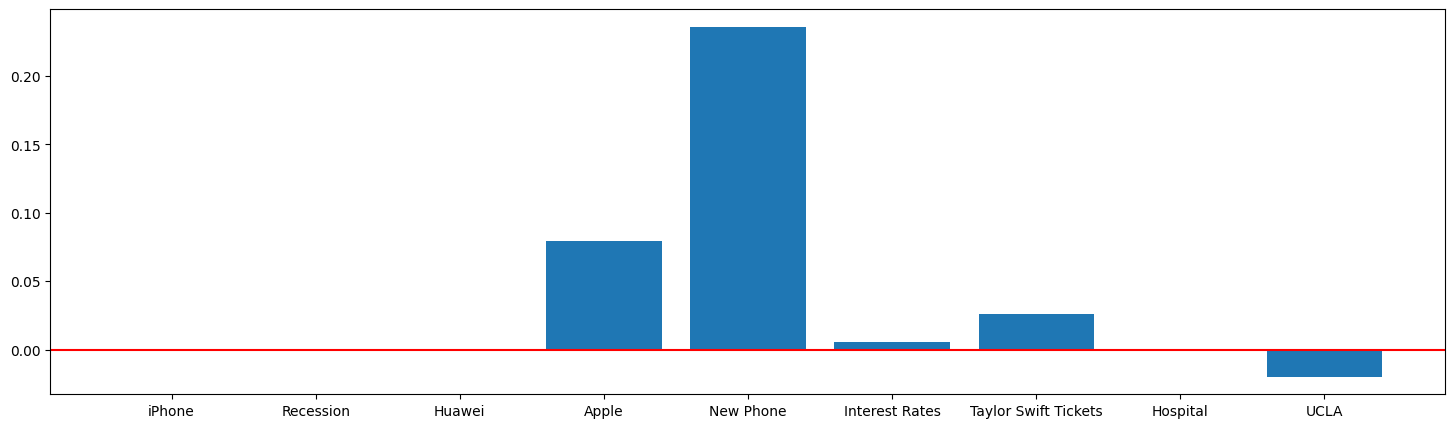

In [52]:
plt.figure(figsize = (18,5))
plt.bar(range(len(coefficients)),coefficients,tick_label=df.columns)
plt.axhline(0,color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In [ ]:
# Things that we suppose should nowcast earnings doesn't have high mganitudes, while things that irrelevant to earnings have high magnitudes

In [ ]:
# It doesn't make much sense, but there must exist some relationship other than causality